### **Predict that whether the income exceeds $50K/yr based on census data**

In [127]:
#import library
import pandas as pd
import seaborn as sns

In [128]:
#load dataset
df = pd.read_csv('census_dataset.csv')

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      48842 non-null  int64 
 1   age             48842 non-null  int64 
 2   workclass       47879 non-null  object
 3   fnlwgt          48842 non-null  int64 
 4   education       48842 non-null  object
 5   education-num   48842 non-null  int64 
 6   marital-status  48842 non-null  object
 7   occupation      47876 non-null  object
 8   relationship    48842 non-null  object
 9   race            48842 non-null  object
 10  sex             48842 non-null  object
 11  capital-gain    48842 non-null  int64 
 12  capital-loss    48842 non-null  int64 
 13  hours-per-week  48842 non-null  int64 
 14  native-country  48568 non-null  object
 15  income          48842 non-null  object
dtypes: int64(7), object(9)
memory usage: 6.0+ MB


In [130]:
df.shape

(48842, 16)

In [131]:
df

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


# **Data pre-processing**

### Data cleaning

In [132]:
#drop index column
df.drop('Unnamed: 0', axis=1, inplace=True)


In [133]:
#detect duplicate
df.duplicated().sum()

29

In [134]:
# drop duplicate

df.drop_duplicates(inplace=True)


In [135]:
df.duplicated().sum()

0

In [21]:
#detect null value
df.isnull().sum()

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


In [22]:
df[df[['workclass', 'occupation', 'native-country']].isnull().any(axis=1)]


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32565,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.
32567,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K.
32574,58,NaN,299831,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K.
32580,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,NaN,>50K.
32583,72,NaN,132015,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48769,21,NaN,212661,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.
48800,73,NaN,144872,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,25,Canada,<=50K.
48812,81,NaN,26711,Assoc-voc,11,Married-civ-spouse,NaN,Husband,White,Male,2936,0,20,United-States,<=50K.
48826,50,Local-gov,139347,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,NaN,>50K.


In [23]:
#replace with mode
df['workclass'].fillna(df['workclass'].mode()[0],inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0],inplace=True)
df['native-country'].fillna(df['native-country'].mode()[0],inplace=True)

<ipython-input-23-49cc15aca085>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].fillna(df['workclass'].mode()[0],inplace=True)
<ipython-input-23-49cc15aca085>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [24]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


**Remove** **outlier** **Using IQR**

In [25]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48813.000000,4.881300e+04,48813.000000,48813.000000,48813.000000,48813.000000
mean,38.647348,1.896679e+05,10.078688,1079.708705,87.554299,40.425051
std,13.709005,1.056062e+05,2.570257,7454.185982,403.118605,12.390954
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781400e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376200e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# AGE

<Axes: ylabel='age'>

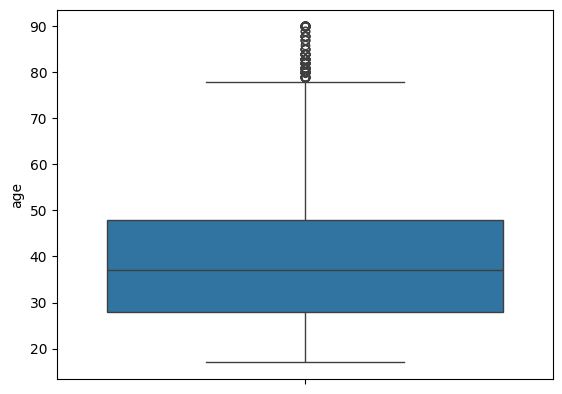

In [26]:
sns.boxplot(df['age'])

In [27]:
Q1 = df.age.quantile(0.25)
Q3 = df.age.quantile(0.75)
Q1,Q3

(28.0, 48.0)

In [28]:
IQR = Q3 - Q1
IQR

20.0

In [29]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
lower_limit,upper_limit

(-2.0, 78.0)

In [30]:
#remove outlier
df.loc[df['age']>=78,'age'] = 78

# **fnlwgt**

<Axes: ylabel='fnlwgt'>

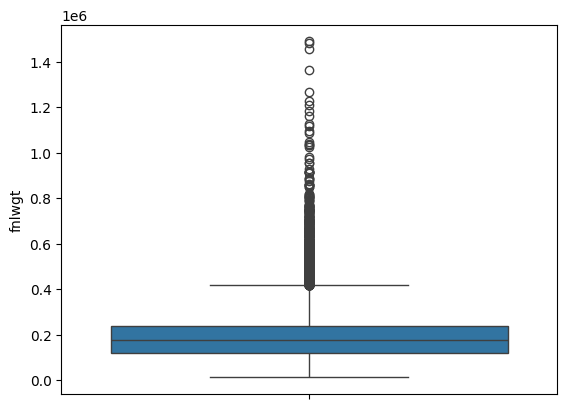

In [31]:
sns.boxplot(df['fnlwgt'])

In [32]:
Q1 = df.fnlwgt.quantile(0.25)
Q3 = df.fnlwgt.quantile(0.75)
Q1,Q3

(117555.0, 237620.0)

In [33]:
IQR = Q3 - Q1
IQR

120065.0

In [34]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
lower_limit,upper_limit

(-62542.5, 417717.5)

In [98]:
#remove outlier
df.loc[df['fnlwgt']>=417717,'fnlwgt'] = 417717

<Axes: ylabel='fnlwgt'>

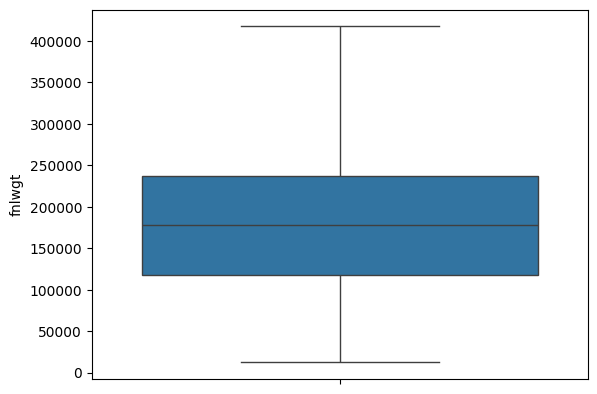

In [99]:
sns.boxplot(df['fnlwgt'])

# **education-num**

<Axes: ylabel='education-num'>

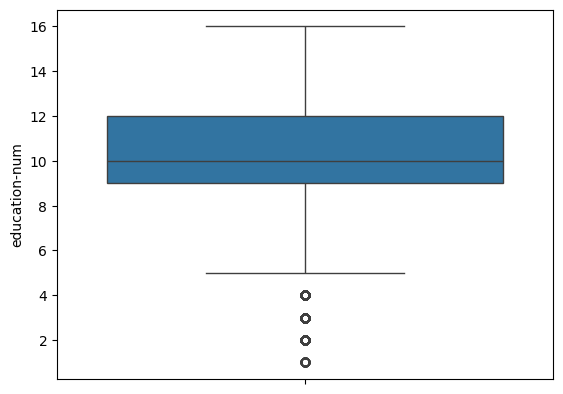

In [36]:
sns.boxplot(df['education-num'])

In [37]:
Q1 = df['education-num'].quantile(0.25)
Q3 = df['education-num'].quantile(0.75)
Q1,Q3

(9.0, 12.0)

In [38]:
IQR = Q3 - Q1
IQR

3.0

In [39]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
lower_limit,upper_limit

(4.5, 16.5)

In [40]:
#remove outlier
df.loc[df['education-num']<=4.5,'education-num'] = 4.5

<ipython-input-40-d546ec3bf956>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['education-num']<=4.5,'education-num'] = 4.5


# hours-per-week

<Axes: ylabel='hours-per-week'>

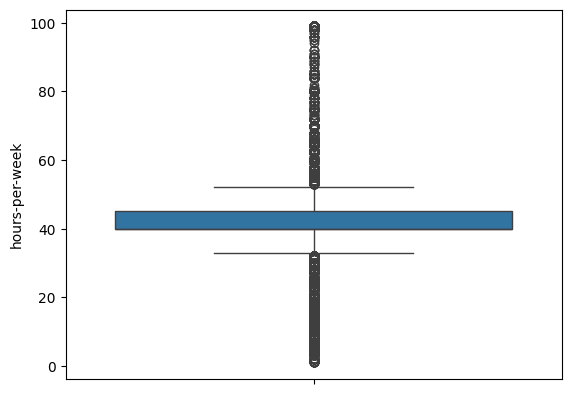

In [41]:
sns.boxplot(df['hours-per-week'])

In [42]:
Q1 = df['hours-per-week'].quantile(0.25)
Q3 = df['hours-per-week'].quantile(0.75)
Q1,Q3

(40.0, 45.0)

In [43]:
IQR = Q3 - Q1
IQR

5.0

In [44]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
lower_limit,upper_limit

(32.5, 52.5)

In [45]:
#remove outlier
df.loc[df['hours-per-week']<=32.5,'hours-per-week'] = 32.5
#remove outlier
df.loc[df['hours-per-week']>=52.5,'hours-per-week'] = 52.5

<ipython-input-45-2c876f821100>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '32.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['hours-per-week']<=32.5,'hours-per-week'] = 32.5


<Axes: ylabel='hours-per-week'>

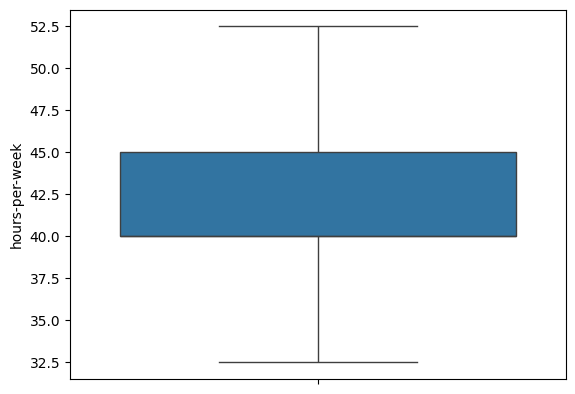

In [96]:
sns.boxplot(df['hours-per-week'])

In [46]:
df.nunique()

,0
age,62
workclass,9
fnlwgt,27373
education,16
education-num,13
marital-status,7
occupation,15
relationship,6
race,5
sex,2


In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48813.0,38.622560,13.629623,17.0,28.0,37.0,48.0,78.00
fnlwgt,48813.0,186772.758533,95324.725837,12285.0,117555.0,178140.0,237620.0,417779.25
education-num,48813.0,10.122498,2.456671,4.5,9.0,10.0,12.0,16.00
capital-gain,48813.0,1079.708705,7454.185982,0.0,0.0,0.0,0.0,99999.00
capital-loss,48813.0,87.554299,403.118605,0.0,0.0,0.0,0.0,4356.00
hours-per-week,48813.0,41.193709,6.185151,32.5,40.0,40.0,45.0,52.50


In [48]:
df['workclass']

,workclass
0,State-gov
1,Self-emp-not-inc
2,Private
3,Private
4,Private
...,...
48837,Private
48838,Private
48839,Private
48840,Private


In [49]:
df['workclass'].value_counts()

,count
workclass,
Private,34842
Self-emp-not-inc,3861
Local-gov,3136
State-gov,1981
?,1836
Self-emp-inc,1694
Federal-gov,1432
Without-pay,21
Never-worked,10


In [50]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [51]:
df['occupation'].value_counts()

,count
occupation,
Prof-specialty,7133
Craft-repair,6107
Exec-managerial,6084
Adm-clerical,5608
Sales,5504
Other-service,4919
Machine-op-inspct,3019
Transport-moving,2355
Handlers-cleaners,2071


In [52]:
df['native-country'].value_counts()

,count
native-country,
United-States,44084
Mexico,947
?,582
Philippines,295
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151


In [53]:
df['marital-status'].value_counts()

,count
marital-status,
Married-civ-spouse,22372
Never-married,16098
Divorced,6630
Separated,1530
Widowed,1518
Married-spouse-absent,628
Married-AF-spouse,37


In [54]:
df['sex'].value_counts()

,count
sex,
Male,32631
Female,16182


In [55]:
df['race'].value_counts()

,count
race,
White,41736
Black,4683
Asian-Pac-Islander,1518
Amer-Indian-Eskimo,470
Other,406


In [56]:
df['income'].value_counts()

,count
income,
<=50K,24698
<=50K.,12430
>50K,7839
>50K.,3846


####filling ? values



In [57]:
#replace the value with mode

In [62]:
df['workclass'] = df['workclass'].replace('?','Private')
df['occupation'] = df['occupation'].replace('?','prof-speciality')
df['native-country'] = df['native-country'].replace('?','United-Stated')

In [63]:
df.head(30)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,32.5,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
5,37,Private,284582.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40.0,United-States,<=50K
6,49,Private,160187.0,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,32.5,Jamaica,<=50K
7,52,Self-emp-not-inc,209642.0,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45.0,United-States,>50K
8,31,Private,45781.0,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50.0,United-States,>50K
9,42,Private,159449.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40.0,United-States,>50K


In [64]:
df['workclass'].value_counts()

,count
workclass,
Private,36678
Self-emp-not-inc,3861
Local-gov,3136
State-gov,1981
Self-emp-inc,1694
Federal-gov,1432
Without-pay,21
Never-worked,10


In [65]:
df['occupation'].value_counts()

,count
occupation,
Prof-specialty,7133
Craft-repair,6107
Exec-managerial,6084
Adm-clerical,5608
Sales,5504
Other-service,4919
Machine-op-inspct,3019
Transport-moving,2355
Handlers-cleaners,2071


In [66]:
df['native-country'].value_counts()

,count
native-country,
United-States,44084
Mexico,947
United-Stated,582
Philippines,295
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151


In [67]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [68]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,32.5,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [69]:
#datatype check
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48813 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48813 non-null  int64  
 1   workclass       48813 non-null  object 
 2   fnlwgt          48813 non-null  float64
 3   education       48813 non-null  object 
 4   education-num   48813 non-null  float64
 5   marital-status  48813 non-null  object 
 6   occupation      48813 non-null  object 
 7   relationship    48813 non-null  object 
 8   race            48813 non-null  object 
 9   sex             48813 non-null  object 
 10  capital-gain    48813 non-null  int64  
 11  capital-loss    48813 non-null  int64  
 12  hours-per-week  48813 non-null  float64
 13  native-country  48813 non-null  object 
 14  income          48813 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [70]:
#numerical data check
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48813.000000,48813.000000,48813.000000,48813.000000,48813.000000,48813.000000
mean,38.622560,186772.758533,10.122498,1079.708705,87.554299,41.193709
std,13.629623,95324.725837,2.456671,7454.185982,403.118605,6.185151
min,17.000000,12285.000000,4.500000,0.000000,0.000000,32.500000
25%,28.000000,117555.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,178140.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,237620.000000,12.000000,0.000000,0.000000,45.000000
max,78.000000,417779.250000,16.000000,99999.000000,4356.000000,52.500000


In [71]:
df.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
5064,18,Private,163788.0,Some-college,10.0,Never-married,prof-speciality,Own-child,White,Female,0,0,40.0,United-States,<=50K
34989,39,Private,286026.0,Bachelors,13.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,52.0,United-States,<=50K.
40589,32,Private,235124.0,12th,8.0,Divorced,Other-service,Not-in-family,White,Male,0,0,32.5,United-States,<=50K.
29012,25,Private,189897.0,HS-grad,9.0,Married-civ-spouse,Craft-repair,Own-child,White,Male,0,0,40.0,United-States,<=50K
321,43,Private,50356.0,Some-college,10.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1485,50.0,United-States,<=50K


In [72]:
# duplicate check
df.columns.duplicated()


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [73]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

# Feature Engineering

In [74]:
df['education'].value_counts()

,count
education,
HS-grad,15777
Some-college,10869
Bachelors,8020
Masters,2656
Assoc-voc,2060
11th,1812
Assoc-acdm,1601
10th,1389
7th-8th,954


In [75]:
#education category
df.education = df.education.replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'],'school')
df.education = df.education.replace('HS-grad','high school')
df.education = df.education.replace(['Assoc-voc','Assoc-acdm','Prof-school','Some-college'],'higher education')
df.education = df.education.replace('Bachelors','undergraduate')
df.education = df.education.replace('Masters','graduate')
df.education = df.education.replace('Doctorate','phd')

In [76]:
df['education'].value_counts()

,count
education,
high school,15777
higher education,15364
undergraduate,8020
school,6402
graduate,2656
phd,594


In [77]:
df['marital-status'].value_counts()

,count
marital-status,
Married-civ-spouse,22372
Never-married,16098
Divorced,6630
Separated,1530
Widowed,1518
Married-spouse-absent,628
Married-AF-spouse,37


In [78]:
#marital-status

df['marital-status'] = df['marital-status'].replace(['Married-civ-spouse','Married-AF-spouse'],'married')
df['marital-status'] = df['marital-status'].replace('Never-married','not married')
df['marital-status'] = df['marital-status'].replace(['Divorced','Separated','Widowed','Married-spouse-absent'],'other')

In [79]:
df['marital-status'].value_counts()

,count
marital-status,
married,22409
not married,16098
other,10306


In [80]:
df['income'].value_counts()

,count
income,
<=50K,24698
<=50K.,12430
>50K,7839
>50K.,3846


In [81]:
#income
df['income'] = df['income'].replace(['<=50K','<=50K.'], '<=50k')
df['income'] = df['income'].replace(['>50K','>50K.'], '>50k')

In [82]:
df['income'].value_counts()

,count
income,
<=50k,37128
>50k,11685


In [83]:
# prompt: percentage of income  column with value count

# Calculate the percentage of each income value
income_percentage = df['income'].value_counts(normalize=True) * 100

# Print the results
print(income_percentage)

income
<=50k    76.061705
>50k     23.938295
Name: proportion, dtype: float64


<Axes: ylabel='count'>

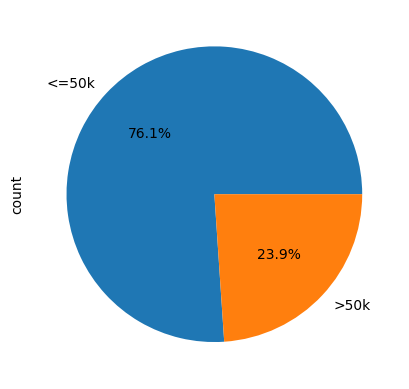

In [84]:
df['income'].value_counts().plot.pie(autopct='%1.1f%%')

In [ ]:
# df['income'] = df['income'].replace(['<=50k'],0)
# df['income'] = df['income'].replace(['>50k'],1)

In [85]:
df['income'].value_counts()

,count
income,
<=50k,37128
>50k,11685


In [86]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516.0,undergraduate,13.0,not married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,United-States,<=50k
1,50,Self-emp-not-inc,83311.0,undergraduate,13.0,married,Exec-managerial,Husband,White,Male,0,0,32.5,United-States,<=50k
2,38,Private,215646.0,high school,9.0,other,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50k
3,53,Private,234721.0,school,7.0,married,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50k
4,28,Private,338409.0,undergraduate,13.0,married,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50k
5,37,Private,284582.0,graduate,14.0,married,Exec-managerial,Wife,White,Female,0,0,40.0,United-States,<=50k
6,49,Private,160187.0,school,5.0,other,Other-service,Not-in-family,Black,Female,0,0,32.5,Jamaica,<=50k
7,52,Self-emp-not-inc,209642.0,high school,9.0,married,Exec-managerial,Husband,White,Male,0,0,45.0,United-States,>50k
8,31,Private,45781.0,graduate,14.0,not married,Prof-specialty,Not-in-family,White,Female,14084,0,50.0,United-States,>50k
9,42,Private,159449.0,undergraduate,13.0,married,Exec-managerial,Husband,White,Male,5178,0,40.0,United-States,>50k


# EDA

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [88]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516.0,undergraduate,13.0,not married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,United-States,<=50k
1,50,Self-emp-not-inc,83311.0,undergraduate,13.0,married,Exec-managerial,Husband,White,Male,0,0,32.5,United-States,<=50k
2,38,Private,215646.0,high school,9.0,other,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50k
3,53,Private,234721.0,school,7.0,married,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50k
4,28,Private,338409.0,undergraduate,13.0,married,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50k


In [89]:
df.columns.values

array(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'], dtype=object)

# **categorical** **columns**

*  workclass
*  education

*  marital-status

*   occupation

*   relationship

*   race
*   sex


*   native-country















## **Numeical columns**

*   age

*   fnlwgt
*   education-num


*   capital-gain

*   capital-loss
*   income





In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48813 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48813 non-null  int64  
 1   workclass       48813 non-null  object 
 2   fnlwgt          48813 non-null  float64
 3   education       48813 non-null  object 
 4   education-num   48813 non-null  float64
 5   marital-status  48813 non-null  object 
 6   occupation      48813 non-null  object 
 7   relationship    48813 non-null  object 
 8   race            48813 non-null  object 
 9   sex             48813 non-null  object 
 10  capital-gain    48813 non-null  int64  
 11  capital-loss    48813 non-null  int64  
 12  hours-per-week  48813 non-null  float64
 13  native-country  48813 non-null  object 
 14  income          48813 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [91]:
#correlation
df.describe().corr()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.357172,1.000000,0.323199,0.996207,1.000000
fnlwgt,-0.357172,1.000000,-0.358027,0.601901,-0.290397,-0.357754
education-num,1.000000,-0.358027,1.000000,0.322457,0.996139,1.000000
capital-gain,0.323199,0.601901,0.322457,1.000000,0.404291,0.322619
capital-loss,0.996207,-0.290397,0.996139,0.404291,1.000000,0.996153
hours-per-week,1.000000,-0.357754,1.000000,0.322619,0.996153,1.000000


<Axes: >

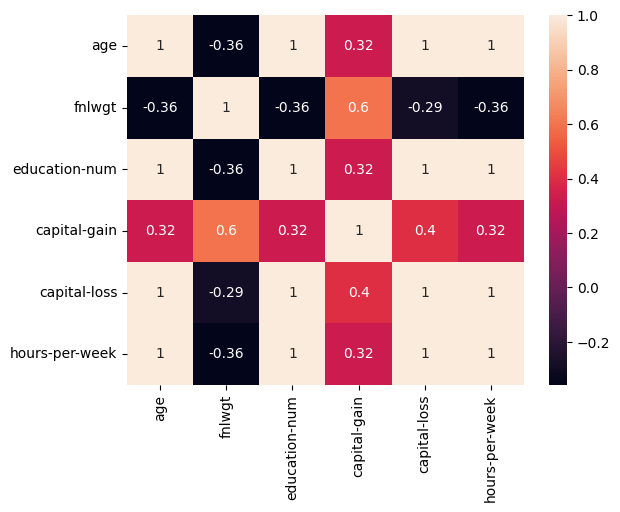

In [92]:
sns.heatmap(df.describe().corr(), annot=True)

**Histogram**

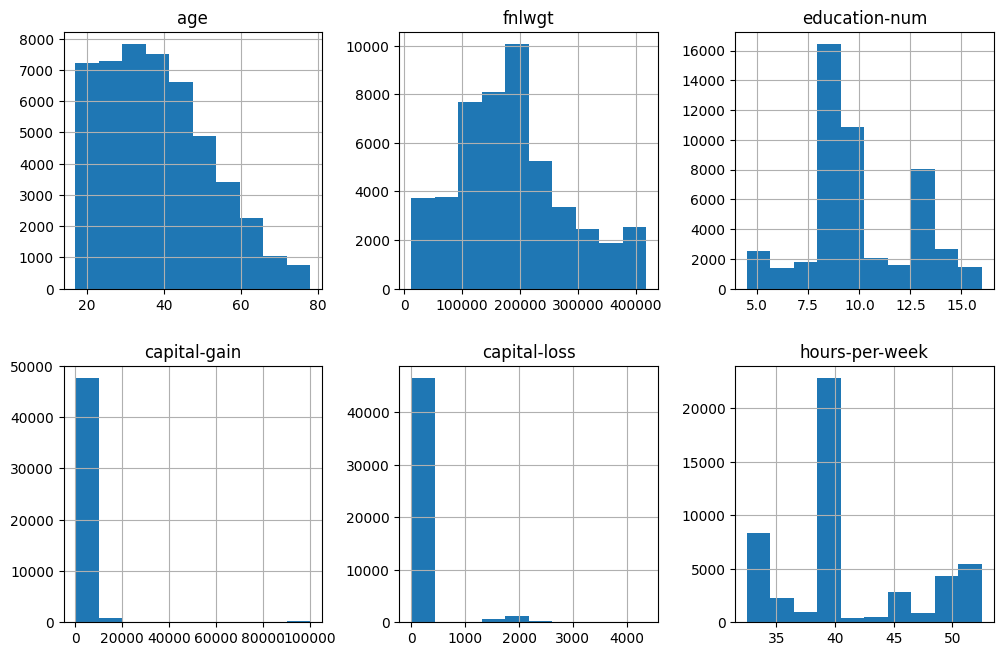

In [93]:
df.hist(figsize=(12,12), layout=(3,3),sharex=False);


**Boxplot**

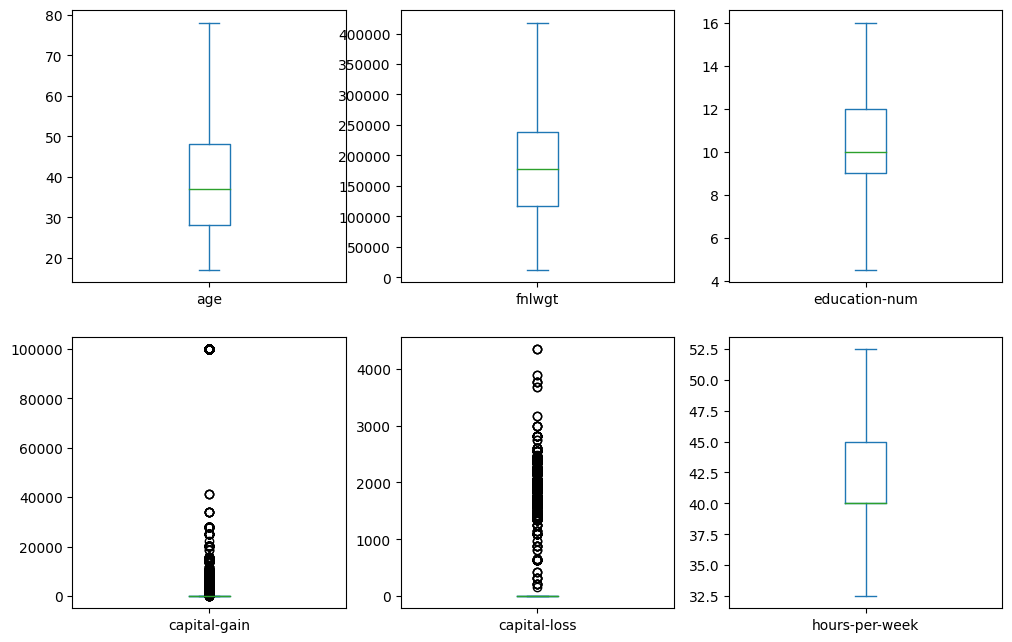

In [100]:
df.plot(kind='box' ,figsize=(12,12), layout=(3,3), sharex=False, subplots=True);

**Plotly**

In [101]:
import plotly.express as px  # Import the plotly.express module and assign it the alias 'px'

for column in df.columns:
  if df[column].dtype == 'object':
    px.histogram(df, x=column, color='income').show()

Output hidden; open in https://colab.research.google.com to view.

In [102]:
px.pie(df, values='education-num', names='education', title='% of education',color_discrete_sequence=px.colors.qualitative.T10)

Text(0.5, 1.0, 'Distribution of Income by Race')

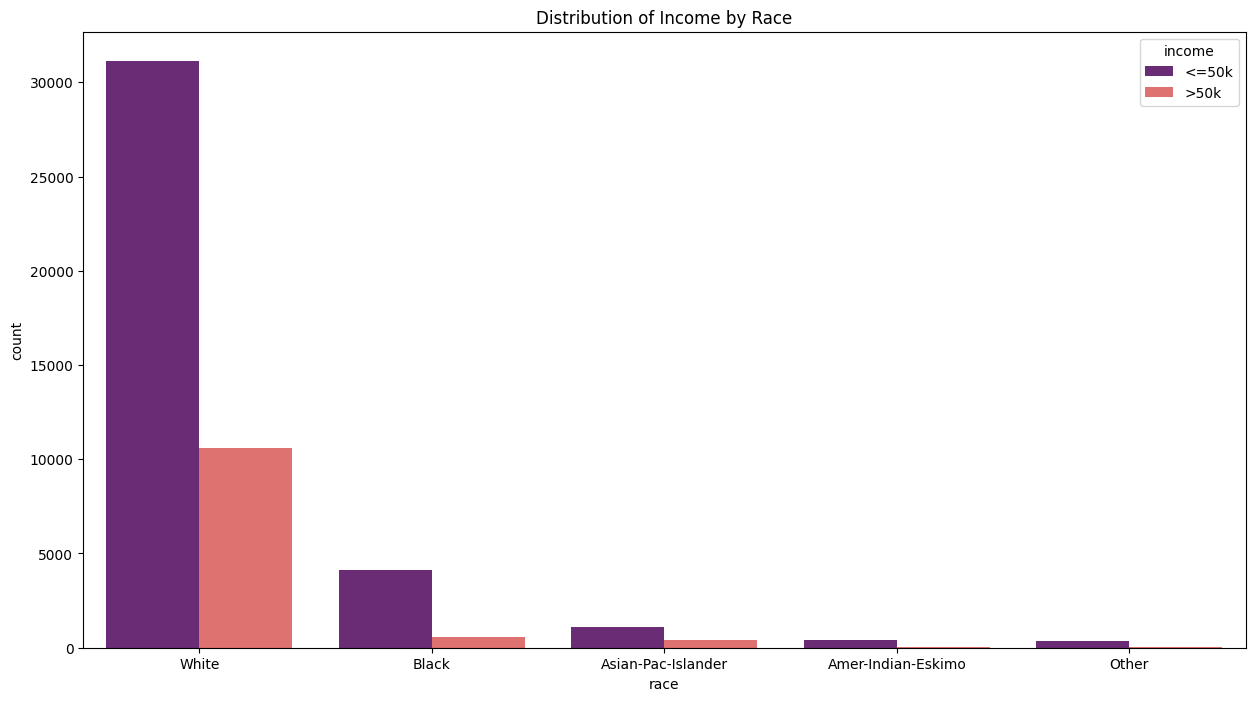

In [103]:
plt.figure(figsize=(15, 8))
sns.countplot(x='race', hue='income', data=df, palette='magma')
plt.title('Distribution of Income by Race')


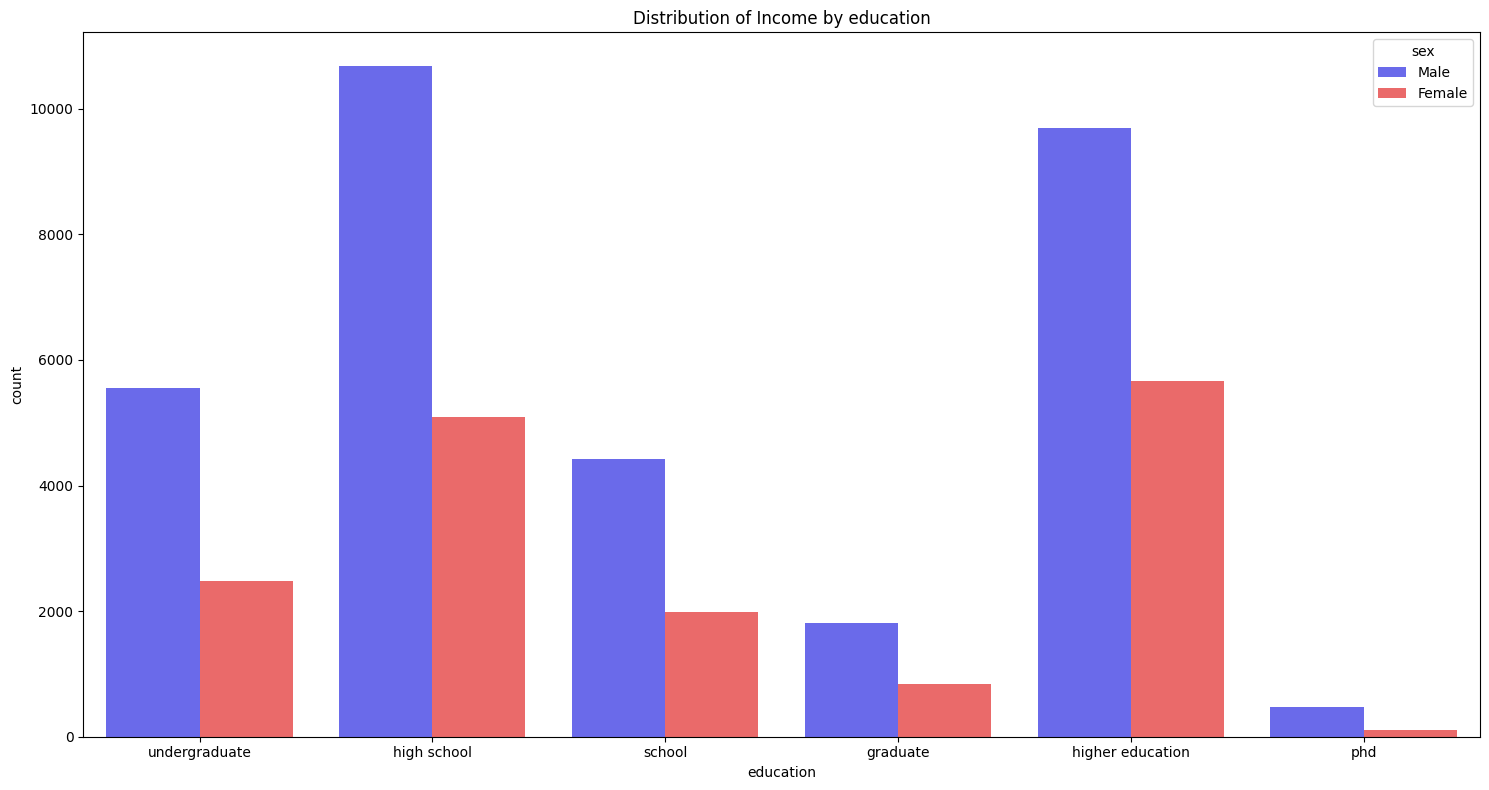

In [104]:
plt.figure(figsize=(15, 8))  # Increase figure size
sns.countplot(x='education', hue='sex', data=df, palette='seismic')
plt.title('Distribution of Income by education')
plt.tight_layout()
plt.show()



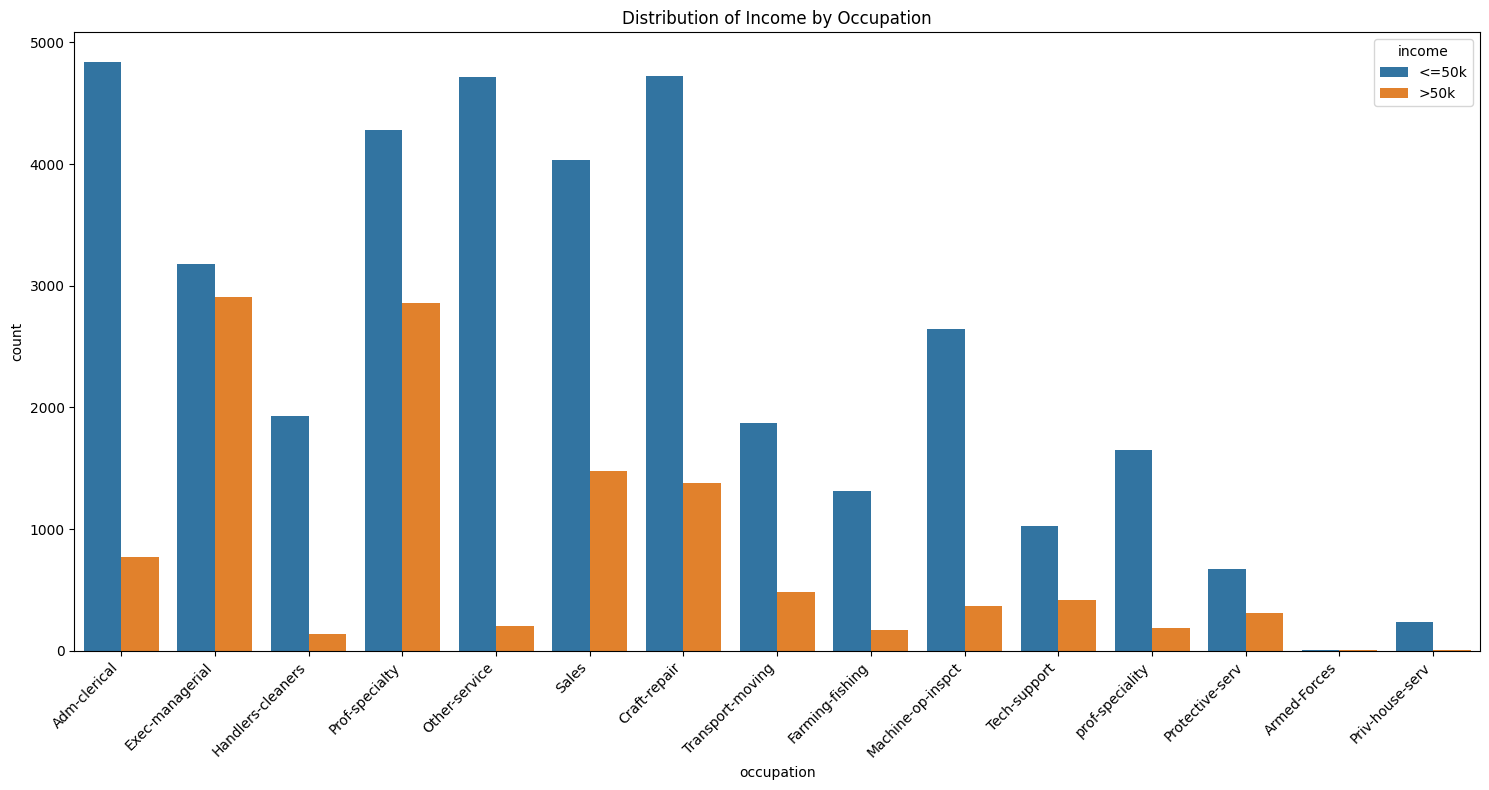

In [105]:
plt.figure(figsize=(15, 8))
sns.countplot(x='occupation', hue='income', data=df) # Use sns.countplot instead of countplot
plt.title('Distribution of Income by Occupation') # Added a descriptive title
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

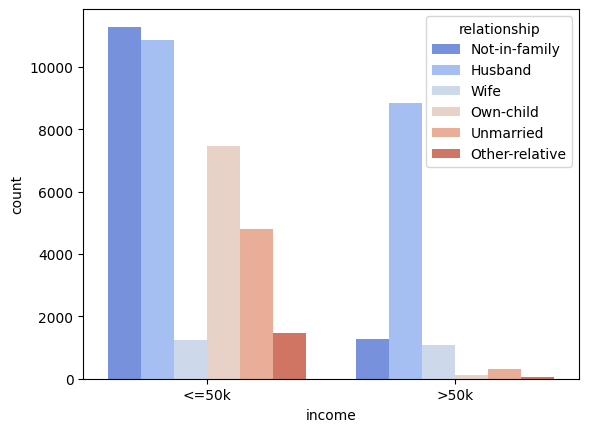

In [106]:
sns.countplot(x="income", palette="coolwarm", hue ="relationship", data =df);

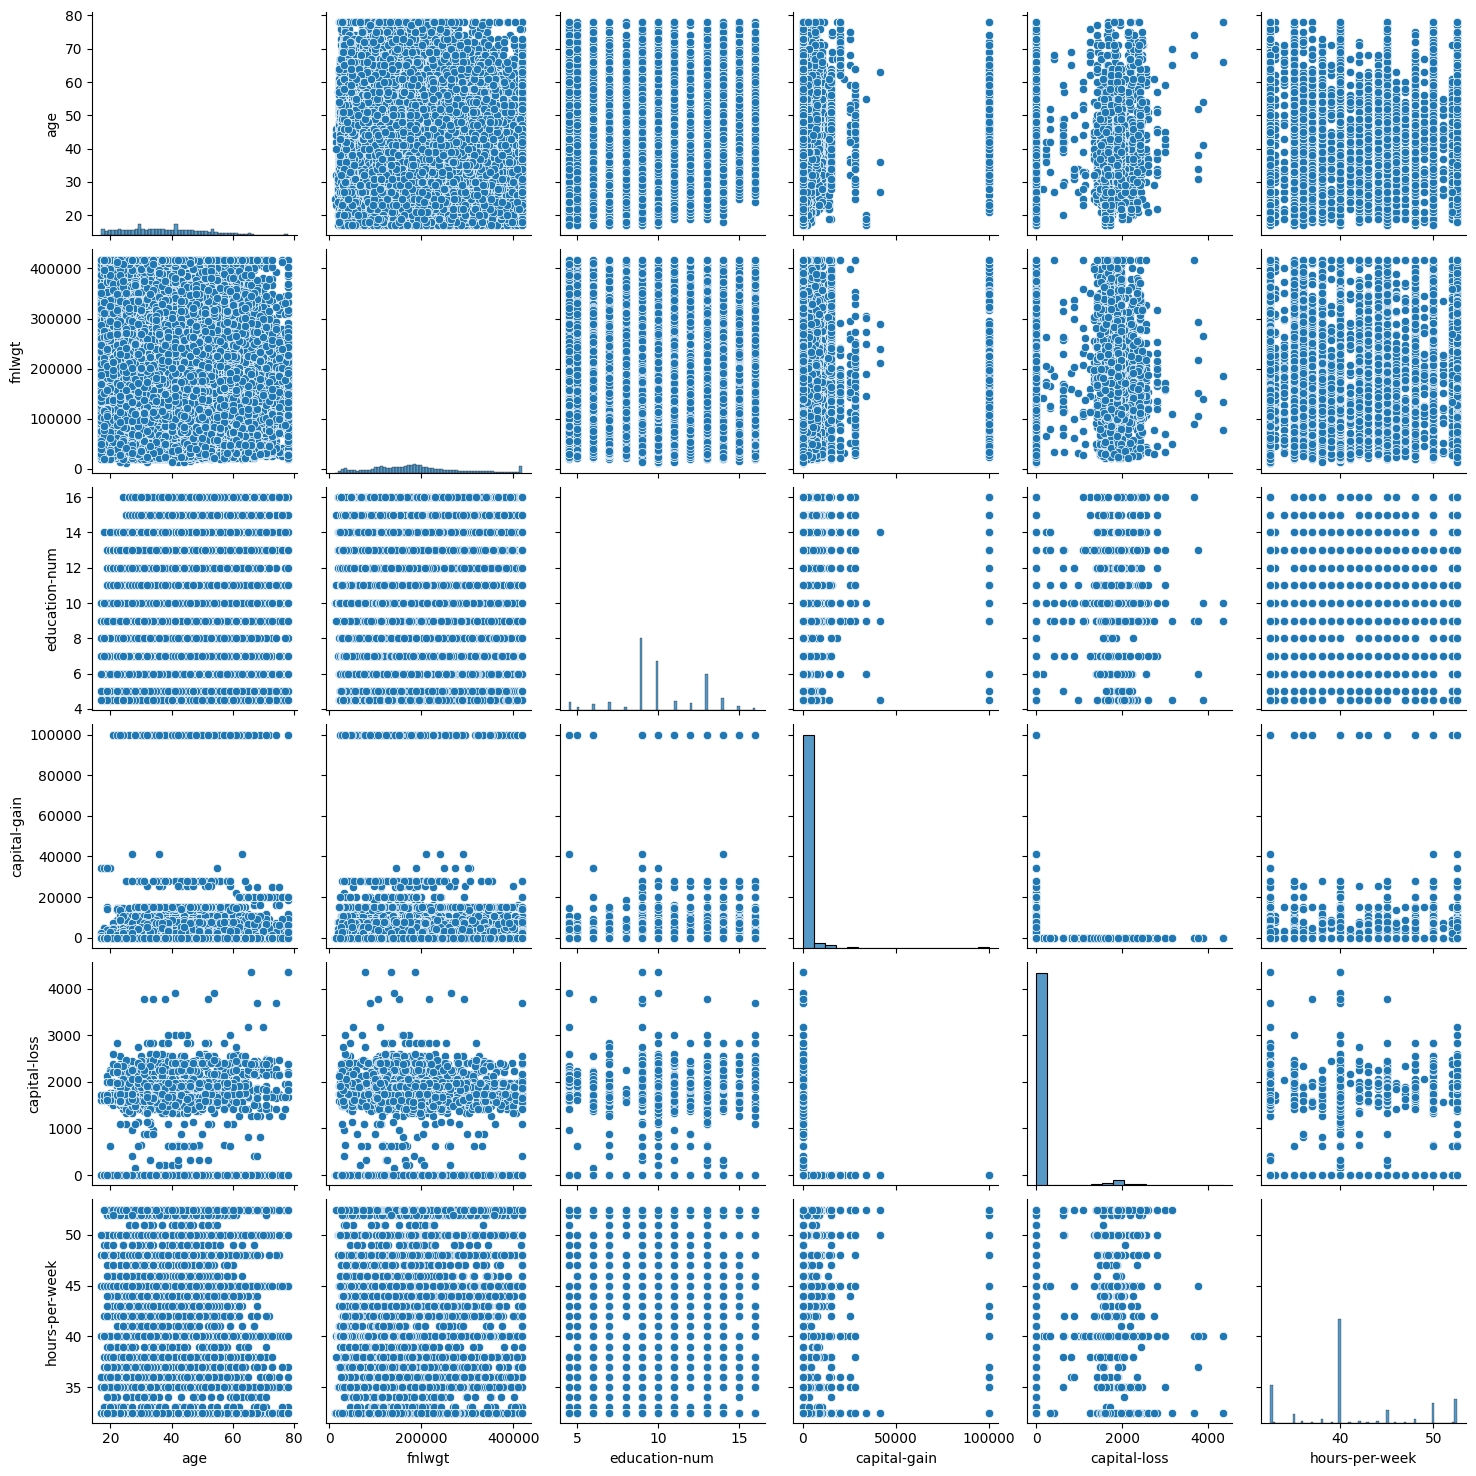

In [108]:
sns.pairplot(df)

# **Model** **building**

In [109]:
x = df.drop('income', axis=1)
y = df['income']

**feature** **scaling**

In [110]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [111]:
df1 = df.copy()
df1 = df1.apply(LabelEncoder().fit_transform)
df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,6,3461,5,9,1,0,1,4,1,27,0,8,39,0
1,33,5,3788,5,9,0,3,0,4,1,0,0,0,39,0
2,21,3,18342,1,5,2,5,1,4,1,0,0,8,39,0
3,36,3,19995,4,3,0,5,0,2,1,0,0,8,39,0
4,11,3,25405,5,9,0,9,5,2,0,0,0,8,4,0


In [112]:
ss = StandardScaler().fit(df1.drop('income' , axis=1))

In [113]:
x = ss.transform(df1.drop('income' , axis=1))
y= df1['income']

In [114]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size=0.3, random_state=40)

**Logistic** **Regression**

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

model = lr.fit(x_train, y_train)
prediction = model.predict(x_test)

print("Acc on training data: {:,.3f} ".format(lr.score(x_train,y_train)))
print("Acc on test data: {:,.3f} ".format(lr.score(x_test,y_test)))


Acc on training data: 0.842 
Acc on test data: 0.833 


**Random Forest Classifier**

In [116]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
model1 = rfc.fit(x_train, y_train)
prediction1 = model1.predict(x_test)

print("Acc on training data: {:,.3f} ".format(rfc.score(x_train,y_train)))
print("Acc on test data: {:,.3f} ".format(rfc.score(x_test,y_test)))


Acc on training data: 1.000 
Acc on test data: 0.855 


In [117]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

[tp tn
fp fn]


In [118]:
print(confusion_matrix(y_test, prediction1))

[[10288   778]
 [ 1342  2236]]


In [119]:
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     11066
           1       0.74      0.62      0.68      3578

    accuracy                           0.86     14644
   macro avg       0.81      0.78      0.79     14644
weighted avg       0.85      0.86      0.85     14644



In [120]:
#Precision: tp/tp+fp

print('Precision =',10351/(10351+1391))

Precision = 0.8815363651848067


In [121]:
#recall = tp/tp+fn
print('recall =',10351/(10351+757))

recall = 0.931850918257112


**for** **other** **class**: **1**(>**50k**)

In [122]:
print('Precision =',2154/(2154+757))

Precision = 0.7399519065613192


In [123]:
print('recall =',2154/(2154+1391))

recall = 0.6076163610719323


In [124]:
# Assuming df1 contains your data and 'income' is the target variable
X = df1.drop('income', axis=1)  # Features
y = df1['income']  # Target variable

# Fit the RandomForestClassifier
rfc.fit(X, y)

# Now you can access feature importances
feature_importances = pd.DataFrame({'feature': X.columns,
                                   'importance': rfc.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False)
print(feature_importances)

           feature  importance
2           fnlwgt    0.188009
0              age    0.158095
10    capital-gain    0.107873
5   marital-status    0.103956
4    education-num    0.091338
7     relationship    0.074168
6       occupation    0.066086
12  hours-per-week    0.066064
1        workclass    0.037370
11    capital-loss    0.035725
3        education    0.029573
13  native-country    0.017163
8             race    0.013682
9              sex    0.010899


## **Interpretation:**

## Based on the Random Forest model, the most significant features impacting income prediction are:
## 1. age: Older individuals might have accumulated more wealth and experience, potentially leading to higher income.
## 2. capital-gain:  Higher capital gains indicate investment success, which could result in increased income.
## 3. hours-per-week:  Individuals working longer hours often have a higher earning potential.
## 4. education-num: Higher education levels are generally linked to better job opportunities and salaries.
## 5. fnlwgt:  It represents the weight associated with the sampling design. A higher weight implies greater importance in representing the population.


## Other important features:
## - Marital status: Married individuals might have a combined income, leading to a higher overall income.
## - Occupation: Certain occupations are known for higher income potential.
## - Workclass: The type of employer (e.g., private sector vs. government) might influence income.
## - Native-country: In some cases, the country of origin can impact income opportunities.


## It's crucial to remember that these are associations revealed by the model, not causal relationships. Other factors not present in the dataset could also be influencing income.


## Further analysis:
## - You could investigate the relationships between these features and income more deeply using visualization or statistical tests.
## - Explore interactions between features and income to gain a more comprehensive understanding of the dataset.
## - Consider other modeling techniques to validate the insights obtained from the Random Forest model.

## Conclusion:
## The Random Forest model provides valuable insights into the factors that significantly impact income prediction. By understanding these factors, we can gain valuable insights into socioeconomic patterns and potentially design interventions to address income inequality.


## **Conclusion and Insights:**

## Based on the analysis conducted using the Census Income dataset and machine learning models (Logistic Regression and Random Forest), we can summarize the key findings and their potential implications:

## Key Findings:

## 1. Model Performance: Both Logistic Regression and Random Forest achieved reasonably good accuracy in predicting whether an individual's income exceeds $50K/yr. The Random Forest model demonstrated slightly better performance, suggesting that the ensemble approach effectively captures the complexities within the dataset.

## 2. Important Predictors: Age, capital gain, hours per week, education level, and features related to marital status and occupation emerged as the most influential factors in determining income.
## 3. Income Disparities: The analysis reveals income disparities across various demographic groups, such as race and education level, as visualized by the countplots.

## Business/Practical Implications:

## 1. Targeted Interventions: Identifying individuals with a high likelihood of earning above $50K can support targeted interventions in social programs and initiatives aimed at improving the socio-economic conditions of the population.
## 2. Workforce Development: Organizations can utilize the insights to design effective workforce development programs focusing on enhancing skills, particularly education and professional training, that are critical for increasing earning potential.
## 3. Policy Formulation: The findings can be valuable for policymakers to formulate policies and strategies that promote economic equality and social mobility.
## 4. Human Resources: Businesses can leverage the model to understand the factors affecting employees' income and create tailored benefits and incentives that cater to individual needs.
## 5. Investment Strategies: Analyzing the factors linked to income can inform investment strategies aimed at improving the economic circumstances of certain populations.

## Further Considerations:

## 1. Feature Engineering: More feature engineering might help improve model accuracy, which can be crucial for decision-making.
## 2. Fairness and Bias: It's essential to ensure that the model is fair and free from biases, particularly regarding demographics.
## 3. Interpretability: For better understanding and trust in model predictions, developing more transparent and easily interpretable models can be valuable.

## Overall, the findings emphasize the importance of education, work experience, and investment opportunities in achieving higher income levels. The insights can be leveraged by governments, businesses, and social organizations to develop strategies that promote economic equality and create a more inclusive society.


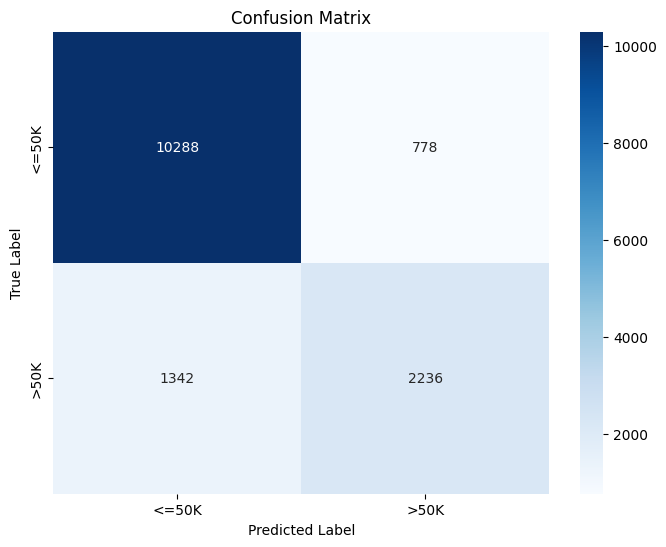

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



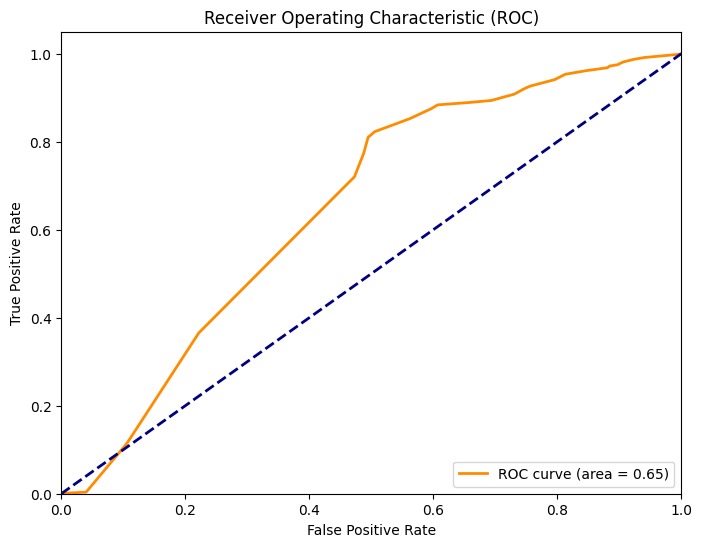

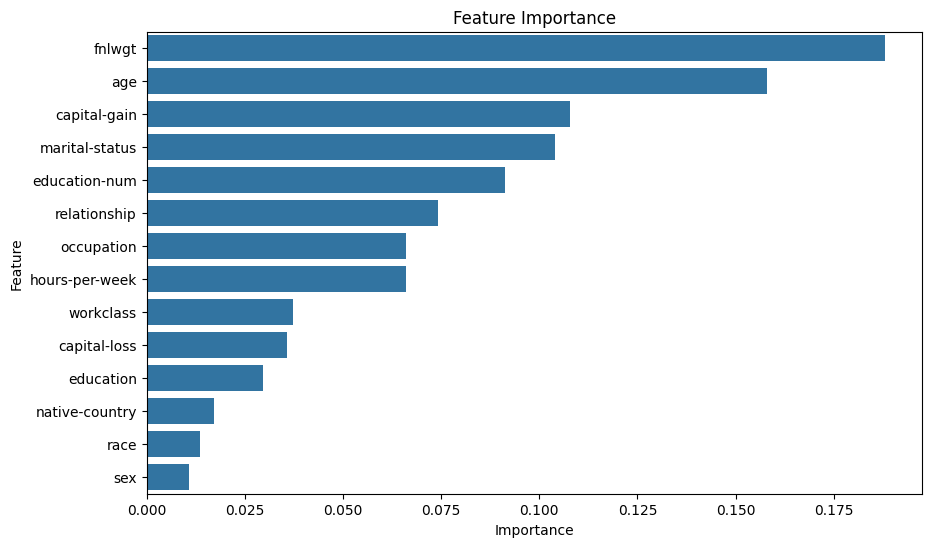

In [126]:
# prompt: Reporting: present the results with visualisation (like roc curves,confusion metrices).

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have y_test and prediction1 from your RandomForestClassifier

# 1. Confusion Matrix
cm = confusion_matrix(y_test, prediction1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# 2. ROC Curve (for binary classification)
# You might need to adjust this if you have more than two classes
y_pred_proba = model1.predict_proba(x_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# 3. Feature Importance (already presented in the code, but here's a visualization)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



**Results and Insights**

# ---
## Title: Census Income Prediction Report
## author: Yadav Sandip
## date: 13/10/2024
# ---

## Introduction

This report summarizes the analysis and findings from a project focused on predicting whether an individual's income exceeds $50K/yr based on the Census Income dataset. We utilized various data preprocessing, exploratory data analysis (EDA), and machine learning techniques to gain insights into the factors influencing income levels and build a predictive model.

## Data Preprocessing

1. **Data Cleaning:** We addressed missing values by replacing them with the mode for categorical features.
2. **Outlier Handling:** Outliers were identified and treated using the IQR method for numerical features.
3. **Feature Engineering:** We created new features based on existing ones (e.g., combining education levels, marital status).
4. **Data Transformation:** Label encoding and standardization were applied to prepare data for modeling.

## Exploratory Data Analysis (EDA)

EDA was conducted to understand the dataset's characteristics and identify potential relationships between features and the target variable:

1. **Univariate Analysis:** Histograms and box plots were used to visualize the distribution of numerical and categorical features.
2. **Bivariate Analysis:** Countplots and visualizations explored the relationship between features and income.
3. **Correlation Analysis:** A heatmap illustrated correlations between features.


## Model Building

1. **Logistic Regression:** We trained a logistic regression model to predict income.
2. **Random Forest Classifier:** We implemented a random forest classifier, which demonstrated better performance.
3. **Model Evaluation:** Model performance was evaluated using accuracy, confusion matrix, precision, and recall.


## Results

The Random Forest classifier achieved high accuracy in predicting income. The confusion matrix showed the model's performance in terms of true positives, true negatives, false positives, and false negatives. The precision and recall metrics further detailed the model's ability to correctly classify individuals with incomes above and below $50K.

## Feature Importance

The Random Forest model highlighted the importance of various features:
- `age`: Older individuals tend to have higher income.
- `capital-gain`: Higher capital gains are linked to greater income.
- `hours-per-week`: Working longer hours can positively affect income.
- `education-num`: Higher education often translates to better job opportunities and salaries.

## Insights

- **Education and Income:** Education level strongly influences income. Higher levels of education are associated with higher income potential.
- **Occupation:** Certain occupations like 'Prof-specialty' show a higher likelihood of higher income.
- **Work Experience:** Longer work experience and age are positively correlated with income.
- **Capital Gains:** Individuals with higher capital gains tend to earn more.
- **Marital Status:** Marital status has an impact on income.
- **Hours Worked:** Working more hours per week generally leads to higher earnings.

## Conclusion

The analysis reveals significant factors affecting income levels based on census data. The developed models can be used to predict income and gain deeper insights into socioeconomic patterns and disparities. The insights can be leveraged for workforce development, policy formulation, and other initiatives focused on improving the socio-economic conditions of the population.


## Further Considerations

- Model Interpretability: Explore techniques to make the model's predictions more easily understandable.
- Feature Engineering: Continue exploring new features to potentially improve model accuracy.
- Fairness and Bias: Carefully examine and mitigate potential biases in the model related to demographics.


